# Exploration into life expectancy in comparison to GDP

this project will be exploring the distributions and correlations of this data using apropriate and well designed visualisations. 

## Aproach
1. inspect the dataset 
2. correlations 
3. conclusions  
  
Thoughout this process there will be added sections as the data anlyis brings up points of interest.




# Load the data

In [46]:
#import relevent libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [20]:
#load 'all_data.csv' into a DataFrame
df = pd.read_csv('all_data.csv')

#display the first few rows of the DataFrame
print(df.head())
print(df.info())
print(df.describe())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
co

there are 4 columns in this data and 96 entries:  
| Column | Type | Description |
| ----------- | ----------- | ----------- |
| Country | String | Nation |
| Year | Int | year of observation |
| Life expectancy at birth (years) | Float | life expectancy value in years |
| GDP | Float | Gross Domestic Product in U.S. dollars |

# Data Inspeciton

## Questions that arrose during data inspection  
1. There is a increase in frequecy at age 45 for life expectancy that doesnt match the distribution.
2. Potential multimodal distribution for GDP.

### Country

In [21]:
#get the unique values of the 'Country' column
country_values = df['Country'].unique()
print(country_values)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


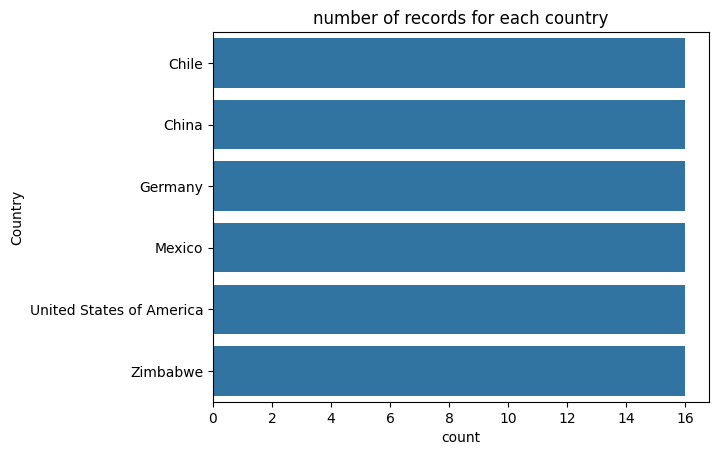

<Figure size 640x480 with 0 Axes>

In [22]:
#bar chart of the 'Country' column
sns.countplot(df["Country"])
plt.title("number of records for each country")
plt.show()
plt.clf()


This shows that there are an equal number of entries for each nation included, this mans that corelation anlysis should not be skewed.

### Year

In [23]:
#get the unique values of the 'Year' column
year_values = df['Year'].unique()
print(year_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


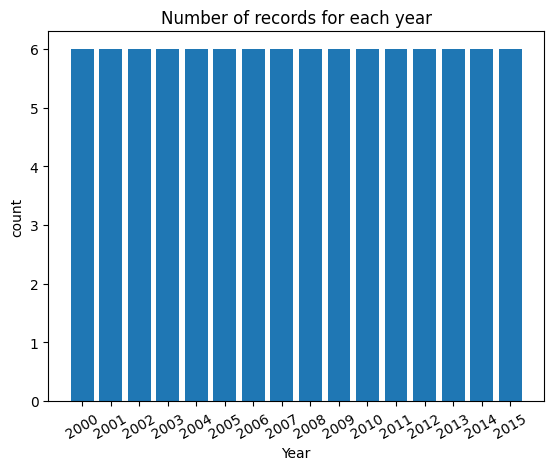

<Figure size 640x480 with 0 Axes>

In [24]:
#bar chart of the 'Year' column
ax = plt.subplot()
plt.bar(range(len(year_values)), df['Year'].value_counts())
ax.set_xticks(range(len(year_values)))
ax.set_xticklabels(year_values, rotation=30)
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Number of records for each year')

plt.show()
plt.clf()

this shows that there are an equal number of records for each year ranging between 2000 and 2015

### Life expectancy at birth (years)

In [25]:
#min mean and max for Life expectancy at birth (years)
le_min = df['Life expectancy at birth (years)'].min()
le_mean = df['Life expectancy at birth (years)'].mean()
le_max = df['Life expectancy at birth (years)'].max()

print(f"min: {le_min}, mean: {le_mean}, max: {le_max}")

min: 44.3, mean: 72.78958333333334, max: 81.0


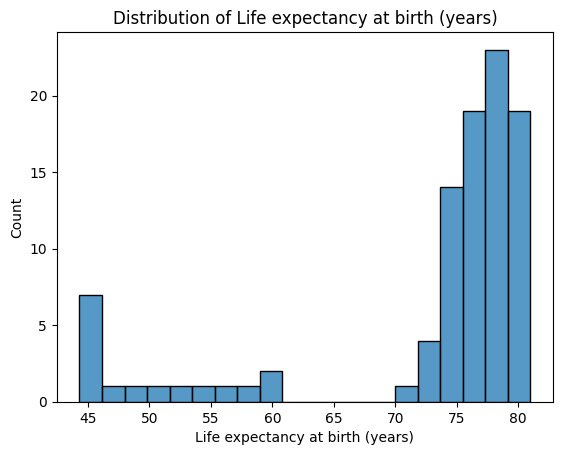

<Figure size 640x480 with 0 Axes>

In [26]:
#distribution of Life expectancy at birth (years)
sns.histplot(df['Life expectancy at birth (years)'], bins=20)
plt.title('Distribution of Life expectancy at birth (years)')
plt.show()
plt.clf()

this shows a distribution heavily scewed to the left, with a bump at age 45. this bump will need to be investigated for cause. 

### GDP

In [27]:
#min mean and max for GDP
gdp_min = df['GDP'].min()
gdp_mean = df['GDP'].mean()
gdp_max = df['GDP'].max()

print(f"min: {gdp_min}, mean: {gdp_mean}, max: {gdp_max}")

min: 4415702800.0, mean: 3880498570768.396, max: 18100000000000.0


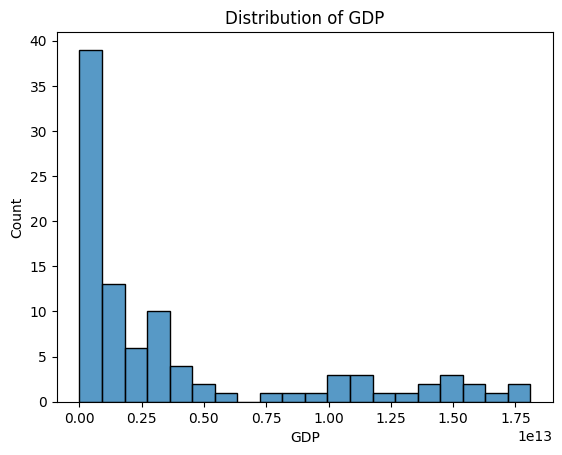

<Figure size 640x480 with 0 Axes>

In [28]:
#distribution of GDP
sns.histplot(df['GDP'], bins=20)
plt.title('Distribution of GDP')
plt.show()
plt.clf()

this shows that the data is scewed to the right with lots of outiers. there is potential for a multimodal distribution.

## Correlations  

current conclusions  
1. life expectancy can be effected by regeon. example shown by zimbabwe.


initial investigations  

1. country v life expectancy 
2. year v life expectancy
3. gdp v year
4. gdp v life expectancy

### Country v Life Expectancy

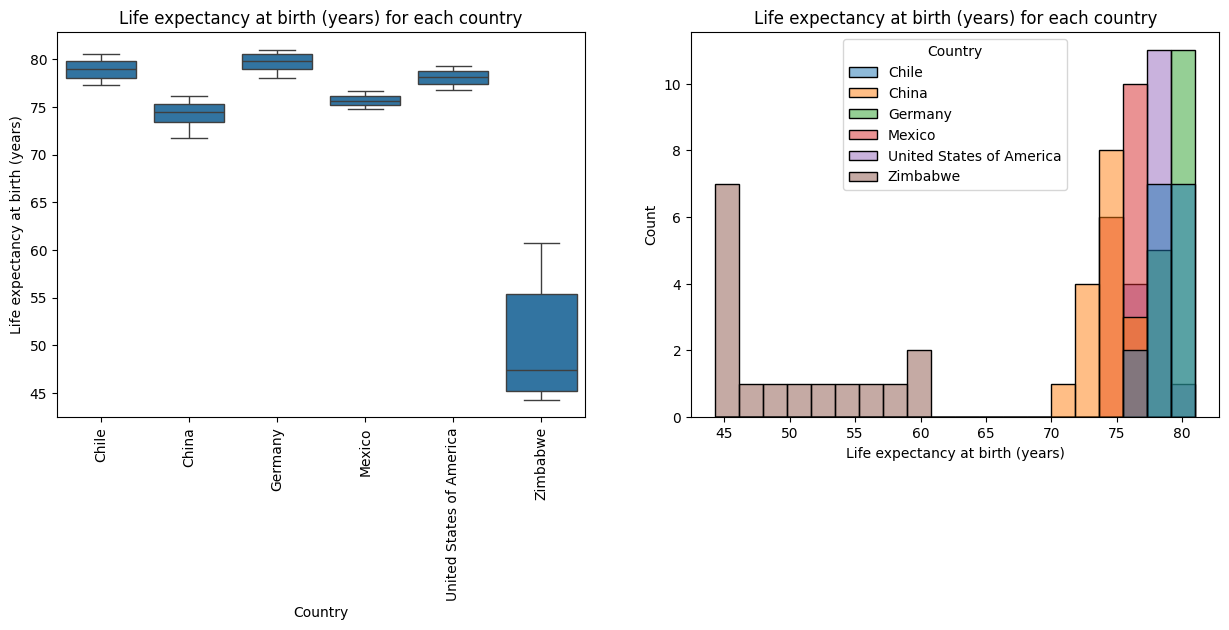

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(15, 5))

#boxpots of life expectancy at birth (years) for each country
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Country', y='Life expectancy at birth (years)')
plt.xticks(rotation=90)
plt.title('Life expectancy at birth (years) for each country')

#histplot of life expectancy at birth (years) for each country
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Life expectancy at birth (years)', hue='Country', bins=20, cbar_kws={'alpha': 0.2})
plt.title('Life expectancy at birth (years) for each country')

plt.show()
plt.clf()

These graphs show that the potential reason for the increase in frequency is due to the data records from zimbabwe. it also shows that zimbabwe has a completely seperate distribution from the other regeons.

### Year v Life Expectancy

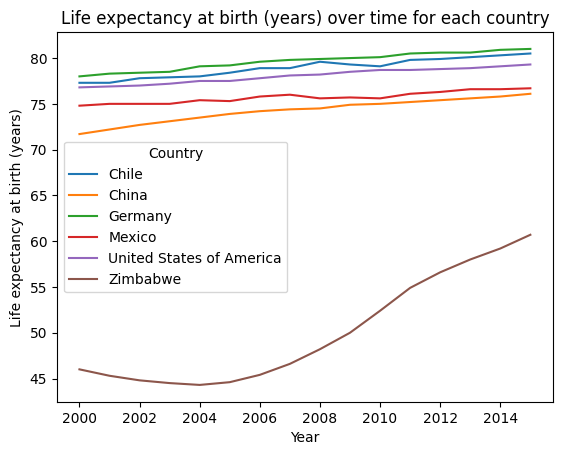

<Figure size 640x480 with 0 Axes>

In [40]:
#line plot of life expectancy at birth (years) over time for each country

sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life expectancy at birth (years) over time for each country')
plt.show()
plt.clf()

after observing the data, an extra variable, country, was included to explain the trends further. continuing on from comparing life expectancy anf countrys, we can see that zimabwe has has a strong upwards trend of life expextancy from around 2005. further more, the rest of the countries have also got an upwards trend for life expectancy. 

### GDP v Year

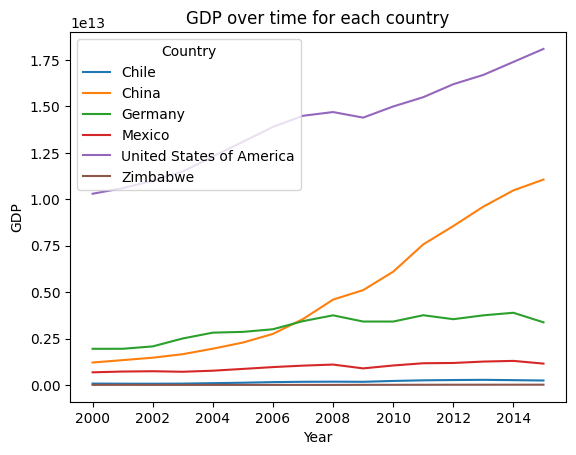

<Figure size 640x480 with 0 Axes>

In [49]:
#line plot of GDP over time for each country
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('GDP over time for each country')
plt.show()
plt.clf()

this shows that the united states and china has had the most gdp growth.

### GDP v Life Expectancy

correlation: 0.12668946170227766
covariance: 1535303223897.6592


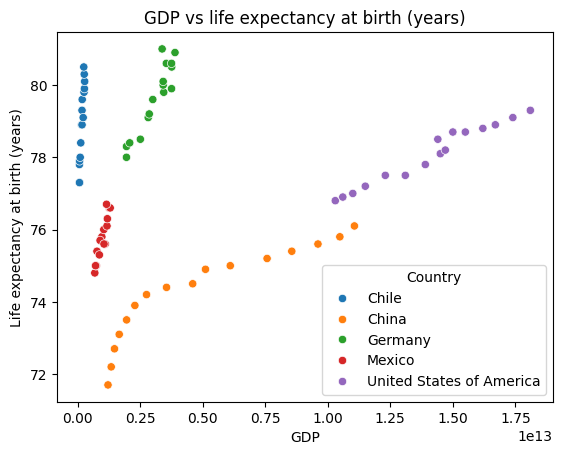

<Figure size 640x480 with 0 Axes>

In [48]:
#scatter plot of GDP vs life expectancy at birth (years)
#remove zimbabwe as it has a very low GDP
df_no_zimbabwe = df[df['Country'] != 'Zimbabwe']
sns.scatterplot(data=df_no_zimbabwe, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title('GDP vs life expectancy at birth (years)')

correlation , p = pearsonr(df_no_zimbabwe.GDP, df_no_zimbabwe['Life expectancy at birth (years)'])
print(f"correlation: {correlation}")
covariance = df_no_zimbabwe.GDP.cov(df_no_zimbabwe['Life expectancy at birth (years)'])
print(f"covariance: {covariance}")

plt.show()
plt.clf()

this shows a positive corelation between higher GDP and a higher life expectancy, expecially in china and the united states. the other regeons have correlations with gdp and life expectancy, however not as strong. zimbabwe was removed to allow the rest of the data to be seen fully. 

## Summary

C:\Users\Holly\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


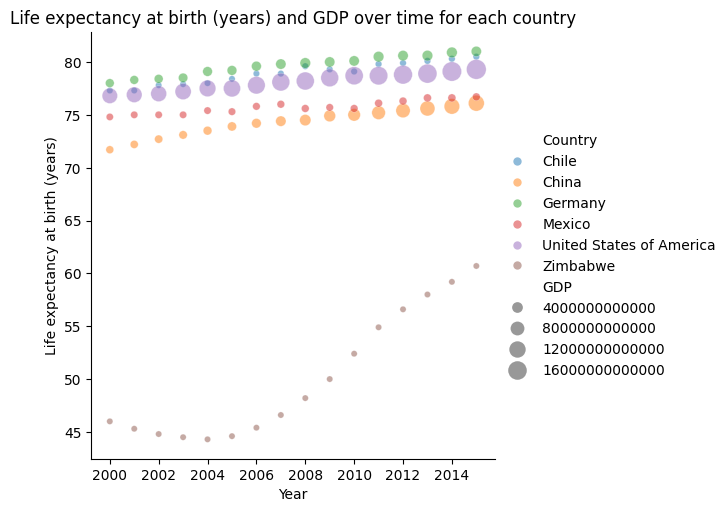

<Figure size 640x480 with 0 Axes>

In [56]:
#bubble graph of life expectancy at birth (years) and GDP over time for each country
#x = year, y = value, size= GDP, color = country
sns.relplot(data=df, x='Year', y='Life expectancy at birth (years)', size='GDP', hue='Country', sizes=(20, 200), alpha=0.5)
plt.title('Life expectancy at birth (years) and GDP over time for each country')
plt.show()
plt.clf()

this graph concludes all that has been learnt through this project. 

conclusions  
1. zimbabwe has a very low life expectancy to the rest of the countries, possibly die to its developmental status. it has however seen an increase in life expectancy since around 2005 (44.3 to 60.7, an increase of 16.4 years). the GDP of the country has not improved so may not be a factor for this country. 
2. china has had the most noticable improvement in GDP expectancy for the 15 years depicted (1 trillion to 11 trillion). life expectancy has also improved, however itis at a similar rate to other country with little imporvement in gdp. 

